In [1]:
%load_ext autoreload
%autoreload 2

# Homework 1: Diagnostic

Ben Fogarty
CAPP 30254: Machine Learning for Public Policy
Spring 2019
9 April 2019

## Initialization

All the code for this assignment is located in a module name chicago_crime.py, which we now load in with the alias cc.

In [2]:
import chicago_crime as cc

This module has the following requirements:


| library | version |
- | - |
| sodapy | |
| pandas | |
| geopandas | |
| shapely | |
| numpy | | 
| seaborn | |
| matplotlib | |
| wrap | |
| urllib | |
| io | |



## Question 1
### Part (a)

To download crime reports data from the Chicago Open Data Portal for the years 2017-2018, there is a function inside chicago_crime named download_crime_reports. This function takes in three parameters: the first year to collect data from and the last year to download data from.

In [3]:
crime_reports = cc.download_crime_reports(2017, 2018)

crime_reports

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30,2017-11-28 21:43:00,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,41.843778,"{'type': 'Point', 'coordinates': [-87.69463767...",JAIL / LOCK-UP FACILITY,-87.694638,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017
1,True,1221,007XX N SACRAMENTO BLVD,JA545986,23,2017-12-11 19:15:00,ARMED: HANDGUN,012,False,03,...,41.894476,"{'type': 'Point', 'coordinates': [-87.70216915...",SIDEWALK,-87.702169,ROBBERY,2018-02-11T15:54:58.000,27,1156092,1904769,2017
2,False,2222,092XX S RACINE AVE,JB147188,73,2017-10-08 03:00:00,NON-AGGRAVATED,022,False,02,...,NaN,NaN,RESIDENCE,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,21,NaN,NaN,2017
3,False,0835,026XX W 79TH ST,JB147595,70,2017-03-28 14:00:00,UNLAWFUL ENTRY,008,False,05,...,NaN,NaN,OTHER,NaN,BURGLARY,2018-02-11T15:57:41.000,18,NaN,NaN,2017
4,False,0313,060XX S EBERHART AVE,JB147230,42,2017-09-09 20:17:00,OVER $500,003,False,06,...,NaN,NaN,RESIDENCE,NaN,THEFT,2018-02-11T15:57:41.000,20,NaN,NaN,2017
5,True,0215,003XX E 47TH ST,JA522842,38,2017-11-23 15:14:00,AGGRAVATED: HANDGUN,002,False,04A,...,41.809343,"{'type': 'Point', 'coordinates': [-87.61909899...",DEPARTMENT STORE,-87.619099,ASSAULT,2018-06-21T15:59:22.000,3,1178967,1873924,2017
6,False,0122,001XX W RANDOLPH ST,JB147599,32,2017-08-26 10:00:00,NON-AGGRAVATED,001,False,02,...,NaN,NaN,HOTEL/MOTEL,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,42,NaN,NaN,2017
7,False,0524,117XX S SANGAMON ST,JB140548,53,2018-02-04 01:36:00,FIRST DEGREE MURDER,005,False,01A,...,41.680739,"{'type': 'Point', 'coordinates': [-87.64566114...",STREET,-87.645661,HOMICIDE,2019-03-18T16:08:09.000,34,1172100,1827003,2018
8,False,2433,011XX W GRANVILLE AVE,JB108189,77,2018-01-08 06:50:00,AUTOMOBILE,024,False,07,...,41.994567,"{'type': 'Point', 'coordinates': [-87.65901631...",STREET,-87.659016,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,48,1167554,1941332,2018
9,False,2411,025XX W TOUHY AVE,JB108139,2,2018-01-07 21:00:00,AUTOMOBILE,024,False,07,...,42.012201,"{'type': 'Point', 'coordinates': [-87.69390481...",STREET,-87.693905,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,50,1158022,1947685,2018


Looking at this data, we can see that the community_area column, which should represent the Chicago neighborhood in which a crime report was filed, is represented as a number instead of a name. These numbers can be mapped to names using the "Boundaries - Community Areas" dataset on the Chicago Open Data Portal (this dataset will also be useful for generating maps later on). In the chicago_crime module, there is a function name download_community_areas that will load in this dataset. 

In [9]:
community_areas = cc.download_community_areas()

There is also a function named link_report_nieghborhood, which takes in a set of crime reports and community areas, and replaces the community_area column in the crimes reports dataset with the appropriate name based on the community areas dataset.

In [10]:
crime_reports = cc.link_reports_neighborhoods(crime_reports, community_areas)

crime_reports

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,latitude,location,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,SOUTH LAWNDALE,2017-11-28 21:43:00,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,41.843778,"{'type': 'Point', 'coordinates': [-87.69463767...",JAIL / LOCK-UP FACILITY,-87.694638,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017
1,True,1221,007XX N SACRAMENTO BLVD,JA545986,HUMBOLDT PARK,2017-12-11 19:15:00,ARMED: HANDGUN,012,False,03,...,41.894476,"{'type': 'Point', 'coordinates': [-87.70216915...",SIDEWALK,-87.702169,ROBBERY,2018-02-11T15:54:58.000,27,1156092,1904769,2017
2,False,2222,092XX S RACINE AVE,JB147188,WASHINGTON HEIGHTS,2017-10-08 03:00:00,NON-AGGRAVATED,022,False,02,...,NaN,NaN,RESIDENCE,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,21,NaN,NaN,2017
3,False,0835,026XX W 79TH ST,JB147595,ASHBURN,2017-03-28 14:00:00,UNLAWFUL ENTRY,008,False,05,...,NaN,NaN,OTHER,NaN,BURGLARY,2018-02-11T15:57:41.000,18,NaN,NaN,2017
4,False,0313,060XX S EBERHART AVE,JB147230,WOODLAWN,2017-09-09 20:17:00,OVER $500,003,False,06,...,NaN,NaN,RESIDENCE,NaN,THEFT,2018-02-11T15:57:41.000,20,NaN,NaN,2017
5,True,0215,003XX E 47TH ST,JA522842,GRAND BOULEVARD,2017-11-23 15:14:00,AGGRAVATED: HANDGUN,002,False,04A,...,41.809343,"{'type': 'Point', 'coordinates': [-87.61909899...",DEPARTMENT STORE,-87.619099,ASSAULT,2018-06-21T15:59:22.000,3,1178967,1873924,2017
6,False,0122,001XX W RANDOLPH ST,JB147599,LOOP,2017-08-26 10:00:00,NON-AGGRAVATED,001,False,02,...,NaN,NaN,HOTEL/MOTEL,NaN,CRIM SEXUAL ASSAULT,2018-02-11T15:57:41.000,42,NaN,NaN,2017
7,False,0524,117XX S SANGAMON ST,JB140548,WEST PULLMAN,2018-02-04 01:36:00,FIRST DEGREE MURDER,005,False,01A,...,41.680739,"{'type': 'Point', 'coordinates': [-87.64566114...",STREET,-87.645661,HOMICIDE,2019-03-18T16:08:09.000,34,1172100,1827003,2018
8,False,2234,011XX W 111TH ST,JB107989,MORGAN PARK,2018-01-07 21:01:00,DOMESTIC BATTERY SIMPLE,022,True,08B,...,41.692259,"{'type': 'Point', 'coordinates': [-87.65053259...",RESIDENCE,-87.650533,BATTERY,2018-05-04T15:51:04.000,34,1170736,1831190,2018
9,False,1834,004XX N MICHIGAN AVE,JB108319,NEAR NORTH SIDE,2018-01-05 18:10:00,RETAIL THEFT,018,False,06,...,41.890384,"{'type': 'Point', 'coordinates': [-87.62410991...",DEPARTMENT STORE,-87.624110,THEFT,2018-05-04T15:51:04.000,42,1177357,1903444,2018


### Part (b)

Having read in the crime_reports dataset and updated the community_area field, we are now ready to summarize the dataset.

In [6]:
len(crime_reports)

534373

We have a total of 534,373 crime reports in our dataset from 2017-2018.

In [7]:
cc.summarize_types(crime_reports)

Dividing based on types of crime:
                                    Count  Percentage
THEFT                              129428   24.220535
BATTERY                             98996   18.525637
CRIMINAL DAMAGE                     56848   10.638262
ASSAULT                             39680    7.425525
DECEPTIVE PRACTICE                  37761    7.066412
OTHER OFFENSE                       34357    6.429404
BURGLARY                            24731    4.628041
NARCOTICS                           24646    4.612134
ROBBERY                             21560    4.034635
MOTOR VEHICLE THEFT                 21394    4.003571
CRIMINAL TRESPASS                   13716    2.566746
WEAPONS VIOLATION                   10136    1.896802
OFFENSE INVOLVING CHILDREN           4497    0.841547
CRIM SEXUAL ASSAULT                  3255    0.609125
PUBLIC PEACE VIOLATION               2867    0.536517
INTERFERENCE WITH PUBLIC OFFICER     2391    0.447440
SEX OFFENSE                          2129    0.3

Across the city, theft is by far the most common crime reported, accounting for more than 24% of all crime reports. Combined, the top three types of crime -- theft, battery, and criminal damage -- account for a little more than half (53%) of all crime reports in Chicago. Burglaries and roberies account for 4.6% and 4.0% of crime reports respectively, and homicides account for 0.24% of all crime reports in Chicago.

In [8]:
cc.summarize_yearly(crime_reports)


      Number of Reports  Percent Change
2017             268098             NaN
2018             266275       -0.679975


The number of crime reports filed in Chicago remained reasonably constant between 2017 and 2018. Though the number of reports did decrease from 268,098 in 2017 to 266,275 in 2018, that quantity represents a decrease of less than one percent.

year                                2017   2018  Change (absolute)
primary_type                                                      
ROBBERY                            11877   9683              -2194
MOTOR VEHICLE THEFT                11406   9988              -1418
BURGLARY                           13001  11730              -1271
CRIMINAL DAMAGE                    29042  27806              -1236
DECEPTIVE PRACTICE                 19028  18733               -295
PUBLIC PEACE VIOLATION              1498   1369               -129
OTHER OFFENSE                      17227  17130                -97
HOMICIDE                             676    586                -90
ARSON                                444    372                -72
OFFENSE INVOLVING CHILDREN          2269   2228                -41
KIDNAPPING                           190    169                -21
PROSTITUTION                         735    718                -17
OTHER NARCOTIC VIOLATION              11      1               

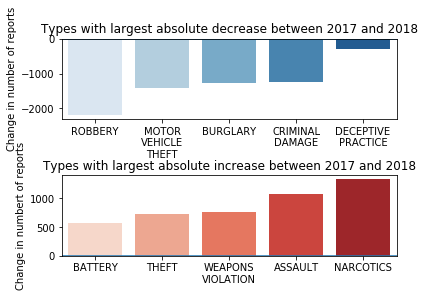

In [9]:
cc.summarize_types_change(crime_reports, '2017', '2018')

Though the overall number of crime reports remain fairly constant between 2017 and 2018, the types of crime reported differed somewhat between the two years. In particular, the number of reports for robberies, motor vehicle thefts, burglaries, and criminal damages decreasing the most between the two years. Reports for narcotics, assaults, weapons violations, thefts, and batteries increased the most between the two years.

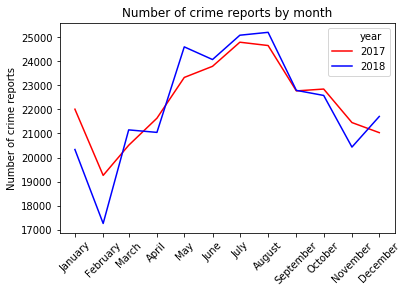

In [10]:
cc.summarize_monthly(crime_reports)

Based on 2017 and 2018 data, the number of crime reports appears to have a seasonal trend, peaking in the summer months and lessening during the winter months. This seasonality, however, does not necessarily hold for individual types of crime reports.

Sex Offenses:


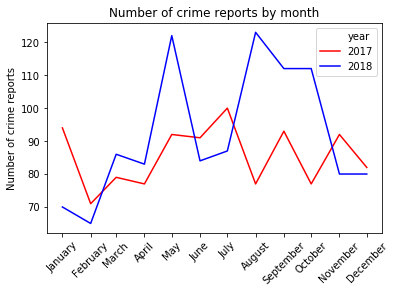


Deceptive Practices:


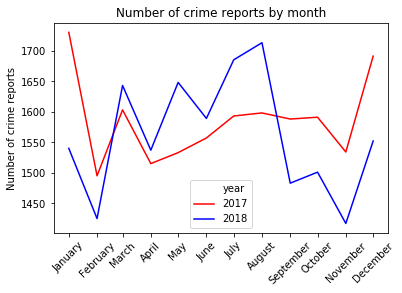

In [11]:
print('Sex Offenses:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'SEX OFFENSE'])
print()

print('Deceptive Practices:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'DECEPTIVE PRACTICE'])

Crime report for sex offenses and deceptive practices, for example, display either much weaker to non-existent seasonal trends.

Thefts:


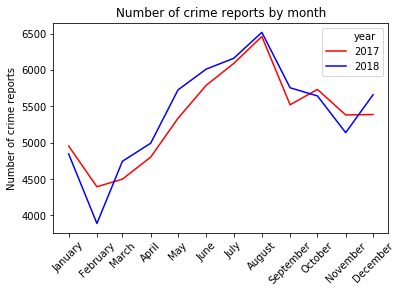


Batteries:


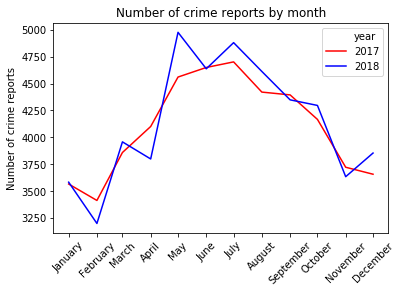


Criminal Damages:


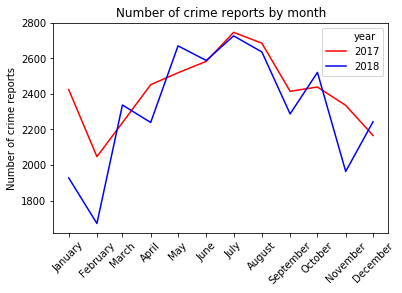

In [12]:
print('Thefts:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'THEFT'])
print()

print('Batteries:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'BATTERY'])
print()

print('Criminal Damages:')
cc.summarize_monthly(crime_reports[crime_reports.primary_type == 'CRIMINAL DAMAGE'])
print()

Theft, battery, and criminal damage crime reports, which as previously stated account for over half of all crime reports in the dataset, however do display strong seasonal trends.

Mean and standard deviation of crime reports per neighborhood:
mean    6939.844156
std     6053.035811
Name: community_area, dtype: float64

Quartiles of crime reports per neighborhood:
0.00      528.0
0.25     2445.0
0.50     4896.0
0.75     9471.0
1.00    30429.0
Name: community_area, dtype: float64



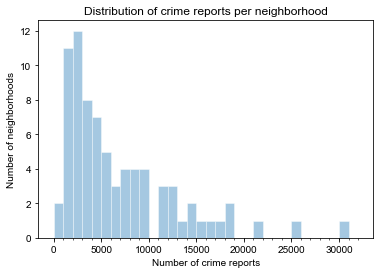

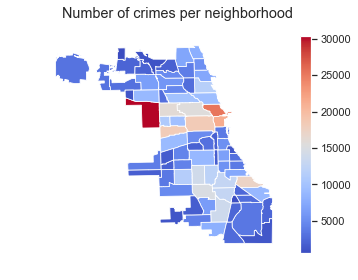


Number of crime reports by neighborhood:
EDISON PARK                 528
BURNSIDE                    755
FOREST GLEN                1042
MOUNT GREENWOOD            1149
MONTCLARE                  1205
HEGEWISCH                  1294
OAKLAND                    1344
ARCHER HEIGHTS             1666
FULLER PARK                1716
BEVERLY                    1809
CLEARING                   1854
MCKINLEY PARK              1958
NORTH PARK                 1967
WEST ELSDON                2031
ARMOUR SQUARE              2034
JEFFERSON PARK             2154
NORWOOD PARK               2275
PULLMAN                    2298
EAST SIDE                  2318
AVALON PARK                2445
RIVERDALE                  2705
NORTH CENTER               2748
CALUMET HEIGHTS            2750
HERMOSA                    2902
KENWOOD                    2988
DUNNING                    3016
BRIDGEPORT                 3025
OHARE                      3313
SOUTH DEERING              3500
WEST LAWN                  364

In [13]:
cc.summarize_neighborhoods(crime_reports, community_areas)

The average number of crime reports per neighborhood is 6940, with a standard deviation of 6053, implying that the number of crimes per neighborhood may vary significantly across neighborhoods. The median number of crime reports per neighborhood is 4896.

The first graph is a histogram illustrating the distribtuion of crime reports per neighborhoods. Considering all crime reports between 2017 and 2018, this distribtuion has a long-right tail, incidating that some neighborhoods experience extreemely high levels of crime relative to most other neighborhoods. There is a large cluster of neighborhoods with between 1000 and 5000 crime reports in the data set, and then other disperesed among higher numers of crime reports.

Looking at the map and table provided at the bottom, the five neighborhoods with the highest number of crime reports are Austin, the Near North Side, the Loop, the Near West Side, and North Lawdale. The Loop and the Near North Side are both located in the heart of Chicago's downtown, but Austin, the Near West Side, and North Lawndale are all located on the city's West Side.

In [14]:
print('The Loop and the Near North Side types of crime:')
cc.summarize_types(crime_reports[(crime_reports.community_area == 'LOOP') | 
                                 (crime_reports.community_area == 'NEAR NORTH SIDE')])
print()

print('Austin, the Near West Side, and North Lawndale types of crime:')
cc.summarize_types(crime_reports[(crime_reports.community_area == 'AUSTIN') | 
                                 (crime_reports.community_area == 'NEAR WEST SIDE') |
                                 (crime_reports.community_area == 'NORTH LAWNDALE')])

The Loop and the Near North Side types of crime:
Dividing based on types of crime:
                                   Count  Percentage
THEFT                              23695   50.579546
DECEPTIVE PRACTICE                  7041   15.029778
BATTERY                             4907   10.474523
CRIMINAL DAMAGE                     2121    4.527504
ASSAULT                             1944    4.149679
ROBBERY                             1501    3.204047
CRIMINAL TRESPASS                   1249    2.666126
OTHER OFFENSE                       1217    2.597818
MOTOR VEHICLE THEFT                  934    1.993724
BURGLARY                             637    1.359746
NARCOTICS                            436    0.930689
CRIM SEXUAL ASSAULT                  294    0.627575
PUBLIC PEACE VIOLATION               239    0.510171
SEX OFFENSE                          154    0.328730
WEAPONS VIOLATION                    101    0.215595
INTERFERENCE WITH PUBLIC OFFICER      68    0.145153
LIQUOR LAW VIOLA

Amongst the five neighborhoods with the most crime reports, the types of crime reports differ somewhat between those neighborhoods located in Chicago's downtown versus the city's West Side. Though reports for theft are the most common type in both groups, they account for more than half of the reports in the Loop and the Near North Side but only 20% of the reports in Austin, the Near West Side, and North Lawndale.

In the Loop and the Near North Side, deceptive practices reports make up 15% of all crime reports, but in Austin, the Near West Side, and North Lawndale, deceptive practices reports make up only 6% of all reports. Narcotics accounts for 10% of all crime reports in the data set from Austin, the Near West Side, and North Lawndale, but less than 1% of all reports in the Loop and the Near North Side.

Homicides:


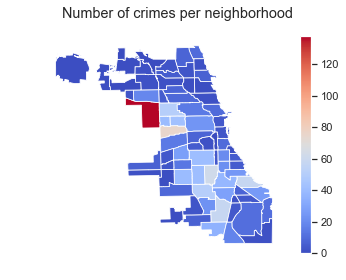


Narcotics:


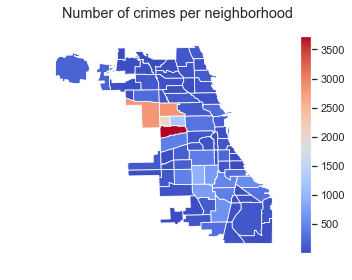


Weapons Violations:


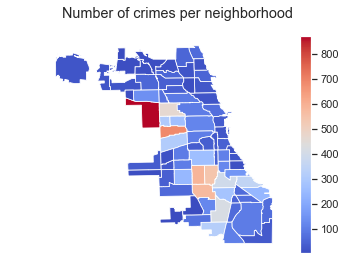

In [15]:
print('Homicides:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'HOMICIDE'], community_areas)
print()

print('Narcotics:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'NARCOTICS'], community_areas)
print()

print('Weapons Violations:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'WEAPONS VIOLATION'], community_areas)



crime_reports.columns

More broadly, we can see that there are difference in where different types of crime reports are concentrated across the city. For example, homicides, narcotics, and weapons violations reports are overwheming concenatrated in some neighborhoods on the city's South and West Sides.

Deceptive Practices:


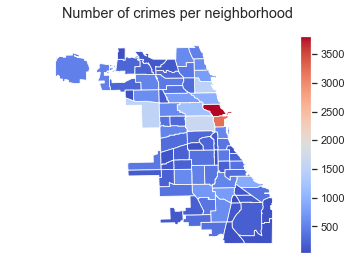


Sex Offenses:


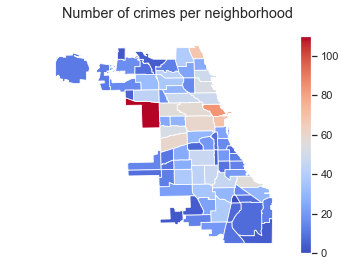


Burglaries:


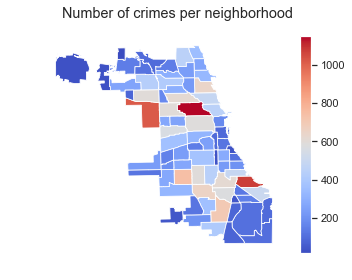

In [16]:
print('Deceptive Practices:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'DECEPTIVE PRACTICE'], community_areas)
print()

print('Sex Offenses:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'SEX OFFENSE'], community_areas)
print()

print('Burglaries:')
cc.map_neighborhood_stats(crime_reports[crime_reports.primary_type == 'BURGLARY'], community_areas)
print()

Meanwhile, reports of deceptive practices are heavliy concentrated in two neighborhoods located in Chicago's downtown area, and reports of sex offenses and burglaries are somewhat more evenly spread out across different parts of the city.

## Question 2

### Set-up

As imported, the crime reports dataset doesn't contain census geographies corresponding to where crime reports were filed. However, the dataset does contain latitude and longitude coordinates that can be combined with the "Boundaries - Census Blocks - 2010" dataset from the Chicago Open Data Portal to link crime reports with Census Blocks. 

Unfortunately, the Census Bureau only reports estimates for the 5-year ACS at the block group level. Therefore, after linking the crime reports with individuals blocks, the function removes the last three digits of the geoid10 field. This process generates an id identifying the Census block group in which a crime report falls.

In [4]:
crime_reports_blocks = cc.link_reports_blocks(crime_reports)

crime_reports_blocks

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year,the_geom,index_right,geoid10
0,True,1034,026XX S CALIFORNIA BLVD,JA529032,30,2017-11-28 21:43:00,VIOLENT OFFENDER: ANNUAL REGISTRATION,010,False,26,...,-87.694638,OTHER OFFENSE,2018-02-11T15:54:58.000,12,1158280,1886310,2017,POINT (-87.69463767800001 41.843778126),36117.0,170318435001
1,True,1221,007XX N SACRAMENTO BLVD,JA545986,23,2017-12-11 19:15:00,ARMED: HANDGUN,012,False,03,...,-87.702169,ROBBERY,2018-02-11T15:54:58.000,27,1156092,1904769,2017,POINT (-87.702169158 41.894475919),32124.0,170318367002
5,True,0215,003XX E 47TH ST,JA522842,38,2017-11-23 15:14:00,AGGRAVATED: HANDGUN,002,False,04A,...,-87.619099,ASSAULT,2018-06-21T15:59:22.000,3,1178967,1873924,2017,POINT (-87.619098999 41.809342727),42140.0,170313814001
7,False,0524,117XX S SANGAMON ST,JB140548,53,2018-02-04 01:36:00,FIRST DEGREE MURDER,005,False,01A,...,-87.645661,HOMICIDE,2019-03-18T16:08:09.000,34,1172100,1827003,2018,POINT (-87.645661144 41.68073915),18393.0,170315303001
8,False,2433,011XX W GRANVILLE AVE,JB108189,77,2018-01-08 06:50:00,AUTOMOBILE,024,False,07,...,-87.659016,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,48,1167554,1941332,2018,POINT (-87.659016317 41.99456734),6325.0,170310301022
9,False,2411,025XX W TOUHY AVE,JB108139,2,2018-01-07 21:00:00,AUTOMOBILE,024,False,07,...,-87.693905,MOTOR VEHICLE THEFT,2018-05-04T15:51:04.000,50,1158022,1947685,2018,POINT (-87.69390481000001 42.01220081),263.0,170310202002
10,False,1834,004XX N MICHIGAN AVE,JB108319,8,2018-01-05 18:10:00,RETAIL THEFT,018,False,06,...,-87.624110,THEFT,2018-05-04T15:51:04.000,42,1177357,1903444,2018,POINT (-87.624109917 41.890384236),27570.0,170310814031
12,False,2223,097XX S HALSTED ST,JB108166,73,2018-01-08 04:09:00,ATTEMPT FORCIBLE ENTRY,022,False,05,...,-87.643094,BURGLARY,2018-05-04T15:51:04.000,21,1172695,1840280,2018,POINT (-87.643093654 41.71716022),1810.0,170317305004
14,True,1612,062XX N OLCOTT AVE,JB108167,10,2018-01-08 04:03:00,DOMESTIC BATTERY SIMPLE,016,False,08B,...,-87.813665,BATTERY,2018-05-04T15:51:04.000,41,1125516,1940832,2018,POINT (-87.813664825 41.993999504),28574.0,170311003005
18,False,0313,004XX E 63RD ST,JB108191,42,2018-01-08 06:55:00,TO VEHICLE,003,False,14,...,-87.615319,CRIMINAL DAMAGE,2018-05-04T15:51:04.000,20,1180086,1863329,2018,POINT (-87.615319321 41.780243493),39490.0,170314207005


Unfortunately, a small number of rows are missing longitude and latitude data or cannot be linked to census blocks data. To avoid errors later in the program, these rows are automatically dropped by the link_reports_blocks function.

In [7]:
print('All crime reports:', len(crime_reports))
print('Successfully linked crime reports:', len(crime_reports_blocks))
print('Dropped crime reports:', len(crime_reports) - len(crime_reports_blocks))

All crime reports: 534374
Successfully linked crime reports: 527211
Dropped crime reports: 7163


For this analysis, I have decided to augment the crime reports with data from the 2013-2017 American Community Survey 5-Year Estimates on educational attainment, race, and per capita income (2017 inflation adjusted dollars). This data can be obtained through the Census Bureau API by calling the get_block_stats function in the chicago_crime module. This function downloads data for every block within the Cook County, Illinois.

In [10]:
block_stats = cc.get_block_stats()

block_stats

,geoid10,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
0,170312519001,1.833333,98.166667,0.000000,8.483290,13117.0
1,170312519002,5.045278,89.003881,5.950841,0.000000,11912.0
2,170318211011,72.856078,1.715138,44.593587,9.651741,20425.0
3,170318211013,75.442478,3.539823,33.628319,16.915995,21575.0
4,170318211012,100.000000,0.000000,2.759740,16.771488,42711.0
5,170318211014,70.243085,0.000000,27.577536,20.180723,19358.0
6,170318202021,80.866602,2.190847,53.164557,13.261372,20220.0
7,170318202023,97.491039,1.254480,19.713262,29.481132,27964.0
8,170318202022,99.468085,0.531915,15.159574,37.765957,33618.0
9,170318203004,70.647059,2.647059,83.705882,4.867725,19461.0


In this questions, we want to summarize blocks by the types of crime that occur on them. Included in chicago_crime is a function, named summarize_by_block, that groups a set of crime reports with census data by block and then summaries based on a user specified field

In [16]:
by_block_summary = cc.summarize_by_block(crime_reports_blocks, 'primary_type')

by_block_summary

primary_type,block,geoid10,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,...,OTHER NARCOTIC VIOLATION,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,0000X E 100TH PL,170314908003,0,8,21,3,0,0,7,1,...,0,1,0,0,0,0,0,0,2,4
1,0000X E 100TH ST,170314908003,0,8,11,0,0,0,6,0,...,0,10,0,0,0,0,0,0,5,1
2,0000X E 101ST PL,170314908005,0,1,8,5,0,0,3,1,...,0,2,0,0,0,1,0,0,6,1
3,0000X E 101ST ST,170314908003,0,1,5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0000X E 101ST ST,170314908005,0,1,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,3,0
5,0000X E 102ND PL,170314908005,0,3,15,2,0,0,5,0,...,0,1,0,0,1,1,0,0,2,4
6,0000X E 102ND ST,170314908005,0,6,3,0,0,1,4,2,...,0,3,1,0,1,1,0,0,1,4
7,0000X E 103RD PL,170314909022,0,0,2,1,0,1,3,1,...,0,3,0,0,0,1,0,0,2,0
8,0000X E 103RD ST,170314908005,0,5,4,0,0,0,1,1,...,0,2,0,0,0,2,0,0,2,2
9,0000X E 103RD ST,170314909022,0,3,5,0,0,0,6,1,...,0,1,0,0,1,1,0,0,17,0


### Part (a)

In [28]:
battery_mask = by_block_summary.BATTERY >= 1
cc.describe_blocks(by_block_summary[battery_mask], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,22864.000000,22864.000000,22864.000000,22864.000000,22864.000000
mean,36.419451,46.439255,25.288943,28.228642,27244.622813
std,33.431812,42.631726,30.329504,23.901854,20781.479758
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,2.056359,2.750929,1.344170,10.405785,14865.000000
50%,33.142857,31.618635,10.059172,20.038536,20588.000000
75%,68.203347,94.152047,43.314106,38.712602,30716.000000
max,100.000000,100.000000,100.000000,100.000000,277577.000000


In all, there were 22,864 blocks on in this dataset on which one or more batteries were reported. On blocks with one or more reports of battery, the average per capita income in 2017 inflation adjusted dollars was $27,244.62. On average, the racial/ethnic composition of these blocks was 36.4\% identifying solely as white, 46.4\% identifying solely as black/African-American, and 25.3\% indetifying as Hispanic or Latino of any race. Additionally, an average of 28.2\% of individuals aged 25 or olders living on blocks with one or more reports of battery had earned a Bachelor's degree or higher.

### Part (b)

In [29]:
homicide_mask = by_block_summary.HOMICIDE >= 1
cc.describe_blocks(by_block_summary[homicide_mask], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000
mean,16.489093,71.741700,18.104415,17.052259,18539.422764
std,24.466993,36.199868,28.212436,15.774631,12446.158211
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,0.000000,56.082084,0.000000,7.244094,12183.500000
50%,3.780069,91.422367,3.797468,12.461059,15677.000000
75%,24.659625,97.955846,21.775976,21.454222,20700.000000
max,96.652268,100.000000,100.000000,93.017843,137729.000000


In all, there were 1,107 blocks on in this dataset on which one or more homicides were reported. On blocks with one or more reports of homicide, the average per capita income in 2017 inflation adjusted dollars was $18,539.42. On average, the racial/ethnic composition of these blocks was 16.5\% identifying solely as white, 71.7\% identifying solely as black/African-American, and 18.1\% indetifying as Hispanic or Latino of any race. Additionally, an average of 17.1\% of individuals aged 25 or olders living on blocks with one or more reports of homicide had earned a Bachelor's degree or higher.

### Part C

In [44]:
#2017 Battery Data
mask_2017 = crime_reports_blocks.year == '2017'

by_block_summary_2017 = cc.summarize_by_block(crime_reports_blocks[mask_2017], 'primary_type')
battery_mask_2017 = by_block_summary_2017.BATTERY >= 1

cc.describe_blocks(by_block_summary_2017[battery_mask_2017], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000
mean,34.051656,49.382674,24.471932,27.016459,26248.344734
std,33.020442,42.632142,30.233928,23.414207,20321.565655
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,1.595745,3.378922,1.089325,10.058027,14439.000000
50%,25.502232,48.014184,9.292763,19.126638,19784.000000
75%,65.103056,95.204795,41.193182,36.222510,29340.000000
max,100.000000,100.000000,100.000000,100.000000,277577.000000


In [45]:
#2018 Battery Data
mask_2018 = crime_reports_blocks.year == '2018'

by_block_summary_2018 = cc.summarize_by_block(crime_reports_blocks[mask_2018], 'primary_type')
battery_mask_2018 = by_block_summary_2018.BATTERY >= 1

cc.describe_blocks(by_block_summary_2018[battery_mask_2018], block_stats)

,White alone (%),Black alone (%),Hispanic or Latino (%),Bachelor's or more (>= 25 y/o) (%),"Per Capita Income, last 12 months (2017 inflation adjusted dollars)"
count,17259.000000,17259.000000,17259.000000,17259.000000,17259.000000
mean,34.144107,49.253603,24.392432,27.371760,26589.313112
std,33.045526,42.631975,30.287287,23.826888,20708.009783
min,0.000000,0.000000,0.000000,0.000000,2971.000000
25%,1.627907,3.434505,1.158038,10.065646,14439.000000
50%,25.502232,47.613636,9.030837,19.101124,19812.000000
75%,65.409717,95.133030,40.872772,36.689038,29744.000000
max,100.000000,100.000000,100.000000,100.000000,173220.000000


Between the years 2017 and 2018, the demographic composition of blocks with one or more reports of battery is overwhelmingly constant for the statisics selected for this analysis. The 2017 and 2018 values of the average racial and ethnic composition statistics are all within 0.2 percentage points. The average percentage of those 25 years or older with a Bachelor's degree or higher are also within 0.4 percentage points of one another between 2017 and 2018. Furthermore, the average per capita income in 2017 inflation adjusted dollars was \$26,248.34 in 2017 and \$26,589.31 in 2018.

## Question 4

### Set-up

Importing numpy to ease some calculations.

In [6]:
import numpy as np

### Part (a)

In [11]:
mask = crime_reports.block == "021XX S MICHIGAN AVE"
counts = crime_reports[mask].primary_type\
                            .value_counts()
pcts = counts.apply(lambda x: x / np.sum(counts))

pcts

BATTERY                   0.266667
OTHER OFFENSE             0.216667
THEFT                     0.100000
CRIMINAL DAMAGE           0.100000
ASSAULT                   0.100000
DECEPTIVE PRACTICE        0.100000
ROBBERY                   0.033333
MOTOR VEHICLE THEFT       0.033333
CRIMINAL TRESPASS         0.016667
BURGLARY                  0.016667
PUBLIC PEACE VIOLATION    0.016667
Name: primary_type, dtype: float64

### Part (b)

In [18]:
mask = crime_reports.primary_type == 'THEFT'
counts = crime_reports[mask].community_area\
                            .value_counts()
pcts = counts.apply(lambda x: x / np.sum(counts))

print('Uptown probability:', pcts['UPTOWN'])
p_garfield = pcts['EAST GARFIELD PARK'] + pcts['WEST GARFIELD PARK']
print("East and West Garfield Park:", p_garfield)
print('Difference:', (p_garfield - pcts['UPTOWN']))

Uptown probability: 0.015097196897116543
East and West Garfield Park: 0.019269400747906174
Difference: 0.004172203850789631


Given that a call comes in about theft, there is a 0.015 (1.5%) chance that the call is from Uptown and a 0.019 (1.9%) chance that the call is from East or West Garfield Park. Therefore, it is more likely that the call is from East or West Garfield Park. In specific, it is 0.4 percentage points more likely that the call is from East or West Garfield Park than from Uptown.

### Part (c)